# Supervised learning example



## Import libraries

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Read data set

In [2]:
data=pd.read_csv("masotas_simulation.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1278 entries, 0 to 1277
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   longitud_bigotes_cms  1278 non-null   float64
 1   peso_gr               1278 non-null   float64
 2   longitud_piernas_cms  1278 non-null   float64
 3   tipo_orejas           1278 non-null   object 
 4   animal                1278 non-null   object 
dtypes: float64(3), object(2)
memory usage: 50.0+ KB


## Some basic techniques of Feature Engineering

**Note.** Please consider that I'm not doing all the FE techniques (like outliers handeling, tranformation or binning), and as we checked it in class, this step is wey important!

In [4]:
#Checking data behaviour
data.describe()

,longitud_bigotes_cms,peso_gr,longitud_piernas_cms
count,1278.000000,1278.000000,1278.000000
mean,6.051369,7120.797496,21.737601
std,1.582232,4568.215340,6.795671
min,0.000000,1000.000000,5.000000
25%,5.000000,3352.333333,15.000000
50%,6.000000,6468.000000,23.000000
75%,7.000000,9913.750000,26.000000
max,30.000000,85000.000000,100.000000


a) Longitud de bigotes

*Why the min is 0??? All dogs have whiskers

b) Peso_gr 
 
 *is there a pet that weights 85 kg?? ( max is 85000)

c) Longitud_piernas_cm

*Is there a pet that has legs of 100 cm?! (1 meter?!)

In [5]:
#All dogs have whiskers, so its important that we replace this 0 value into a possible number. Lets say 0.5 cm
data[data['longitud_bigotes_cms'] == 0]
data['longitud_bigotes_cms'] = data['longitud_bigotes_cms'].replace({0:0.5})
min(data['longitud_bigotes_cms'])

0.5

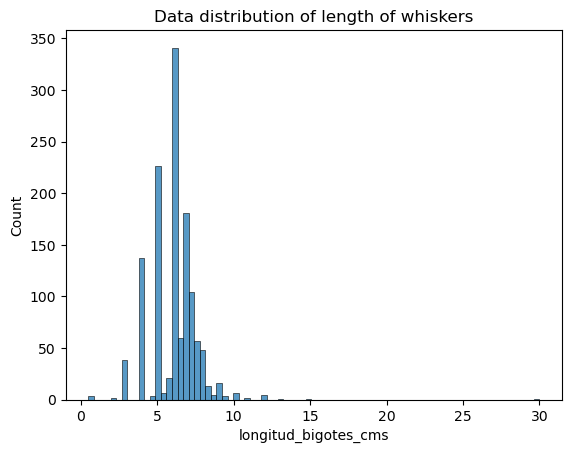

In [6]:
#Lets see how is the data distribution of this variable
import seaborn as sns
sns.histplot(data=data, x='longitud_bigotes_cms')
plt.title('Data distribution of length of whiskers')
plt.show()

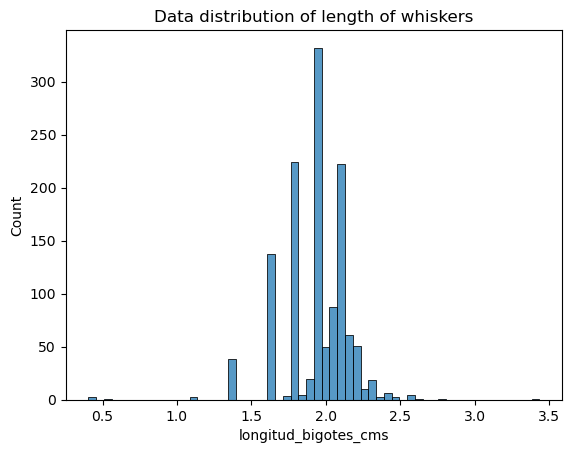

In [7]:
#In previous plot we can see a super outlier at the 30 value. 
#Since we are interested in keeping all the data in the dataset, we will not drop it. We will transform it using logarithmic method
data['longitud_bigotes_cms'] = np.log((data['longitud_bigotes_cms']+1))
sns.histplot(data=data, x='longitud_bigotes_cms')
plt.title('Data distribution of length of whiskers')
plt.show()

We can now see no outliers in our column. We can now move on to the next one :) (Peso_gr)

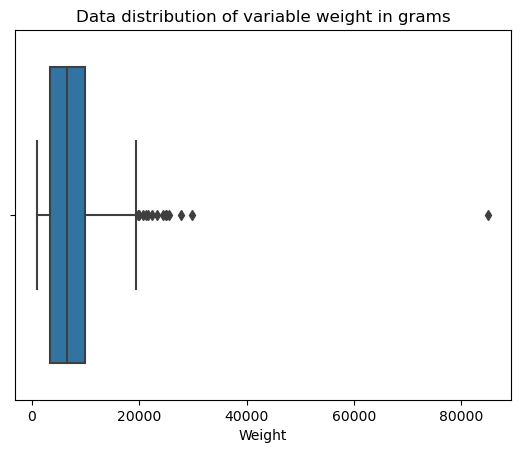

In [8]:
sns.boxplot(data=data, x='peso_gr')
plt.title('Data distribution of variable weight in grams')
plt.xlabel('Weight')
plt.show()

Previous boxplot shows all considered outliers in this column, however it exists a data point even way further than the others.
This will be eliminated and then a logarithmic transformation will be performed.

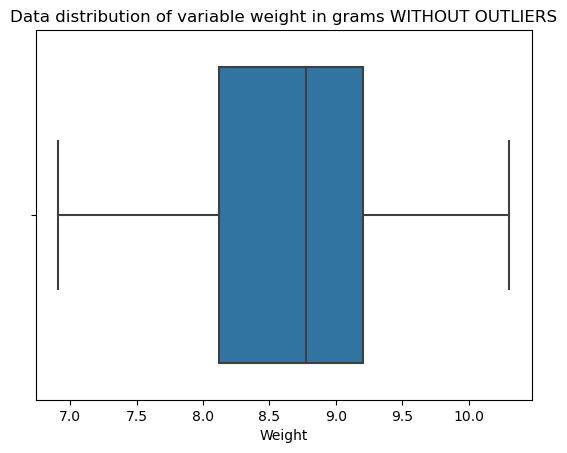

In [9]:
data = data[data['peso_gr'] < 80000] #elimination of super outlier
data['peso_gr'] = np.log((data['peso_gr']+1))

sns.boxplot(data=data, x='peso_gr')
plt.title('Data distribution of variable weight in grams WITHOUT OUTLIERS')
plt.xlabel('Weight')
plt.show()

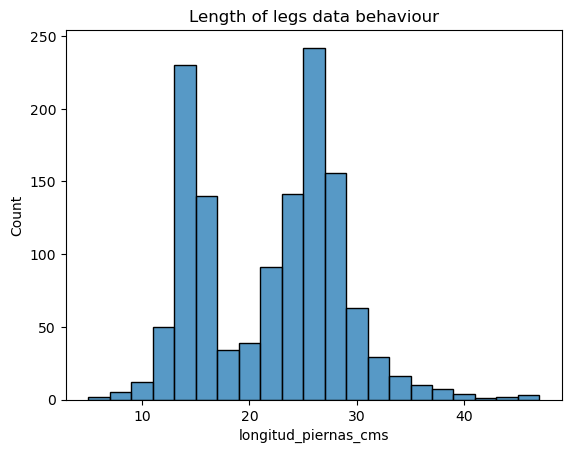

In [10]:
#We will finally have a look into the length of the legs data.
sns.histplot(data=data, x='longitud_piernas_cms')
plt.title('Length of legs data behaviour')
plt.show()

no outliers seem to appear in this column, so we will continue with categorical columns.


In [11]:
#Converting categorical data into dummies for further analysis
data=data.join(pd.get_dummies(data.tipo_orejas)).copy()

In [12]:
data.corr()

,longitud_bigotes_cms,peso_gr,longitud_piernas_cms,Ovaladas,Puntiagudas
longitud_bigotes_cms,1.000000,-0.137617,-0.170049,-0.394486,0.394486
peso_gr,-0.137617,1.000000,0.872027,0.624345,-0.624345
longitud_piernas_cms,-0.170049,0.872027,1.000000,0.556035,-0.556035
Ovaladas,-0.394486,0.624345,0.556035,1.000000,-1.000000
Puntiagudas,0.394486,-0.624345,-0.556035,-1.000000,1.000000


We will drop "Ovaladas" since the column "Puntiagudas" already describe how the ears are. So Ovaladas would be an extra column


In [13]:
data.drop(["tipo_orejas","Ovaladas"],axis=1,inplace=True)
data.head()

,longitud_bigotes_cms,peso_gr,longitud_piernas_cms,animal,Puntiagudas
0,1.791759,9.210440,32.0,Perro,1
1,2.302585,8.131825,32.0,Perro,0
2,2.397895,8.294300,15.0,Gato,1
3,1.945910,8.194506,15.0,Gato,1
4,2.079442,10.126671,15.0,Perro,0


## Definition of input and output

In [14]:
#We are now going to separate our dependant variables and the value we want to predict (cat or dog??) 
X=data.drop(["animal"],axis=1).copy()
y=data.animal.apply(lambda x: 1 if x=="Perro" else 0)

In [15]:
data["animal_num"]=y

## Splitting X and y in to train and test sets

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Features Scaling

**Note.** It's very important that our model could generalized the result even for new data, and this including the scaling - we have to be sure that the scaling will be work even for those unseen data. So, we need to apply our scaler _only_ to train set and measure the performance on test set.

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [18]:
X_train_tranformada=scaler.transform(X_train)
X_test_transormada=scaler.transform(X_test)

In [19]:
X_train_tranformada

array([[0.70717745, 0.75082712, 0.48905109, 0.        ],
       [0.69376509, 0.30088169, 0.19099757, 1.        ],
       [0.6918138 , 0.3559086 , 0.21602364, 1.        ],
       ...,
       [0.77229896, 0.37697025, 0.22871046, 1.        ],
       [0.70186349, 0.30716708, 0.22871046, 1.        ],
       [0.66266751, 0.34449769, 0.26520681, 1.        ]])

# Logistic model

In [20]:
from sklearn.linear_model import LogisticRegression

model_logit=LogisticRegression()
model_logit.fit(X_train_tranformada,y_train)

LogisticRegression()

In [21]:
y_hat=model_logit.predict(X_test_transormada)

## Model evaluation

In [22]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score

confusion_matrix(y_test,y_hat)

array([[129,   0],
       [  3, 252]], dtype=int64)

In [23]:
model_logit_acc=accuracy_score(y_test,y_hat)
model_logit_acc

0.9921875

In [24]:
model_logit_f1=f1_score(y_test,y_hat)
model_logit_f1

0.9940828402366864

In [25]:
model_logit_auc=roc_auc_score(y_test,y_hat)
model_logit_auc

0.9941176470588236

### Model interpretation

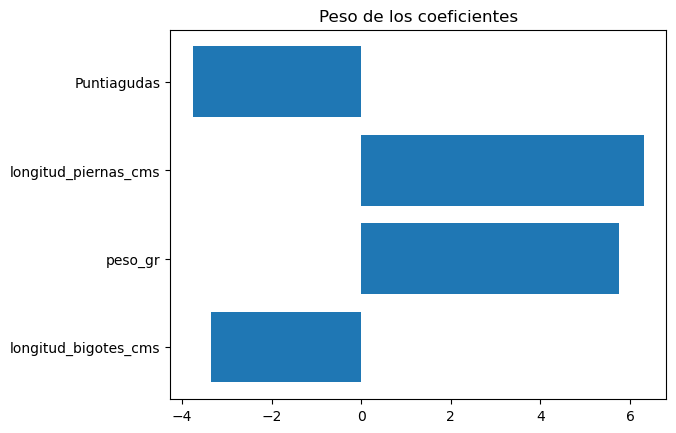

In [26]:
plt.barh(list(X.columns),list(model_logit.coef_[0]))
plt.title("Peso de los coeficientes")
plt.show()

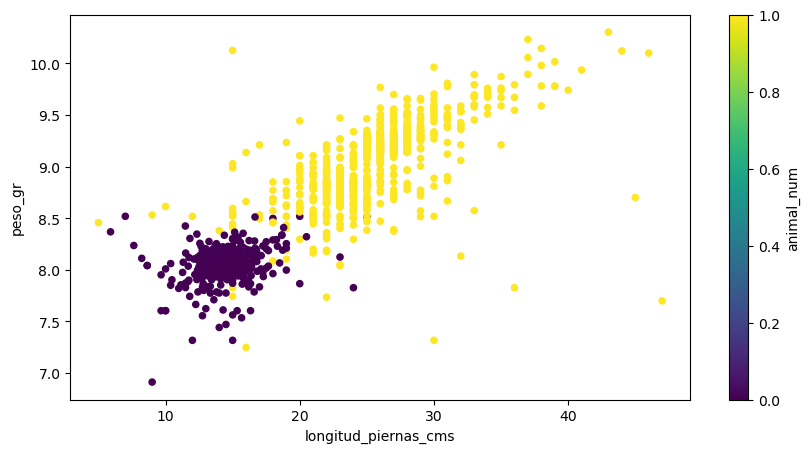

In [27]:
data.plot.scatter(x='longitud_piernas_cms',y='peso_gr',c='animal_num',colormap='viridis',figsize=(10,5))
plt.show()

# KNN model

In [28]:
from sklearn.neighbors import KNeighborsClassifier

model_knn=KNeighborsClassifier(n_neighbors=10)
model_knn.fit(X_train_tranformada,y_train)

KNeighborsClassifier(n_neighbors=10)

In [29]:
y_hat=model_knn.predict(X_test_transormada)

C:\Users\MacBook\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


## Model evaluation

In [30]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score

confusion_matrix(y_test,y_hat)

array([[129,   0],
       [  3, 252]], dtype=int64)

In [31]:
model_knn_acc=accuracy_score(y_test,y_hat)
model_knn_acc

0.9921875

In [32]:
model_knn_f1=f1_score(y_test,y_hat)
model_knn_f1

0.9940828402366864

In [33]:
model_knn_auc=roc_auc_score(y_test,y_hat)
model_knn_auc

0.9941176470588236

# Classification tree model

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

model_tree=DecisionTreeClassifier()
model_tree.fit(X_train_tranformada,y_train)

DecisionTreeClassifier()

In [35]:
y_hat=model_tree.predict(X_test_transormada)

## Model evaluation

In [36]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score

confusion_matrix(y_test,y_hat)

array([[127,   2],
       [  5, 250]], dtype=int64)

In [37]:
model_tree_acc=accuracy_score(y_test,y_hat)
model_tree_acc

0.9817708333333334

In [38]:
model_tree_f1=f1_score(y_test,y_hat)
model_tree_f1

0.9861932938856015

In [39]:
model_tree_auc=roc_auc_score(y_test,y_hat)
model_tree_auc

0.9824441404468764

### Model interpretation

This kind of model are easy to interpret. We can use `feature_importances_` method to measure the importance of each variable (using Gini impurity) and also, we can plot the final tree to see each decision.

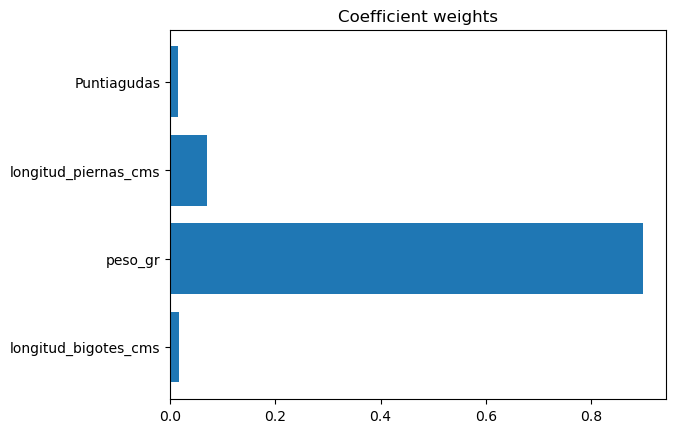

In [51]:
plt.barh(list(X.columns),list(model_tree.feature_importances_))
plt.title("Coefficient weights")
plt.show()

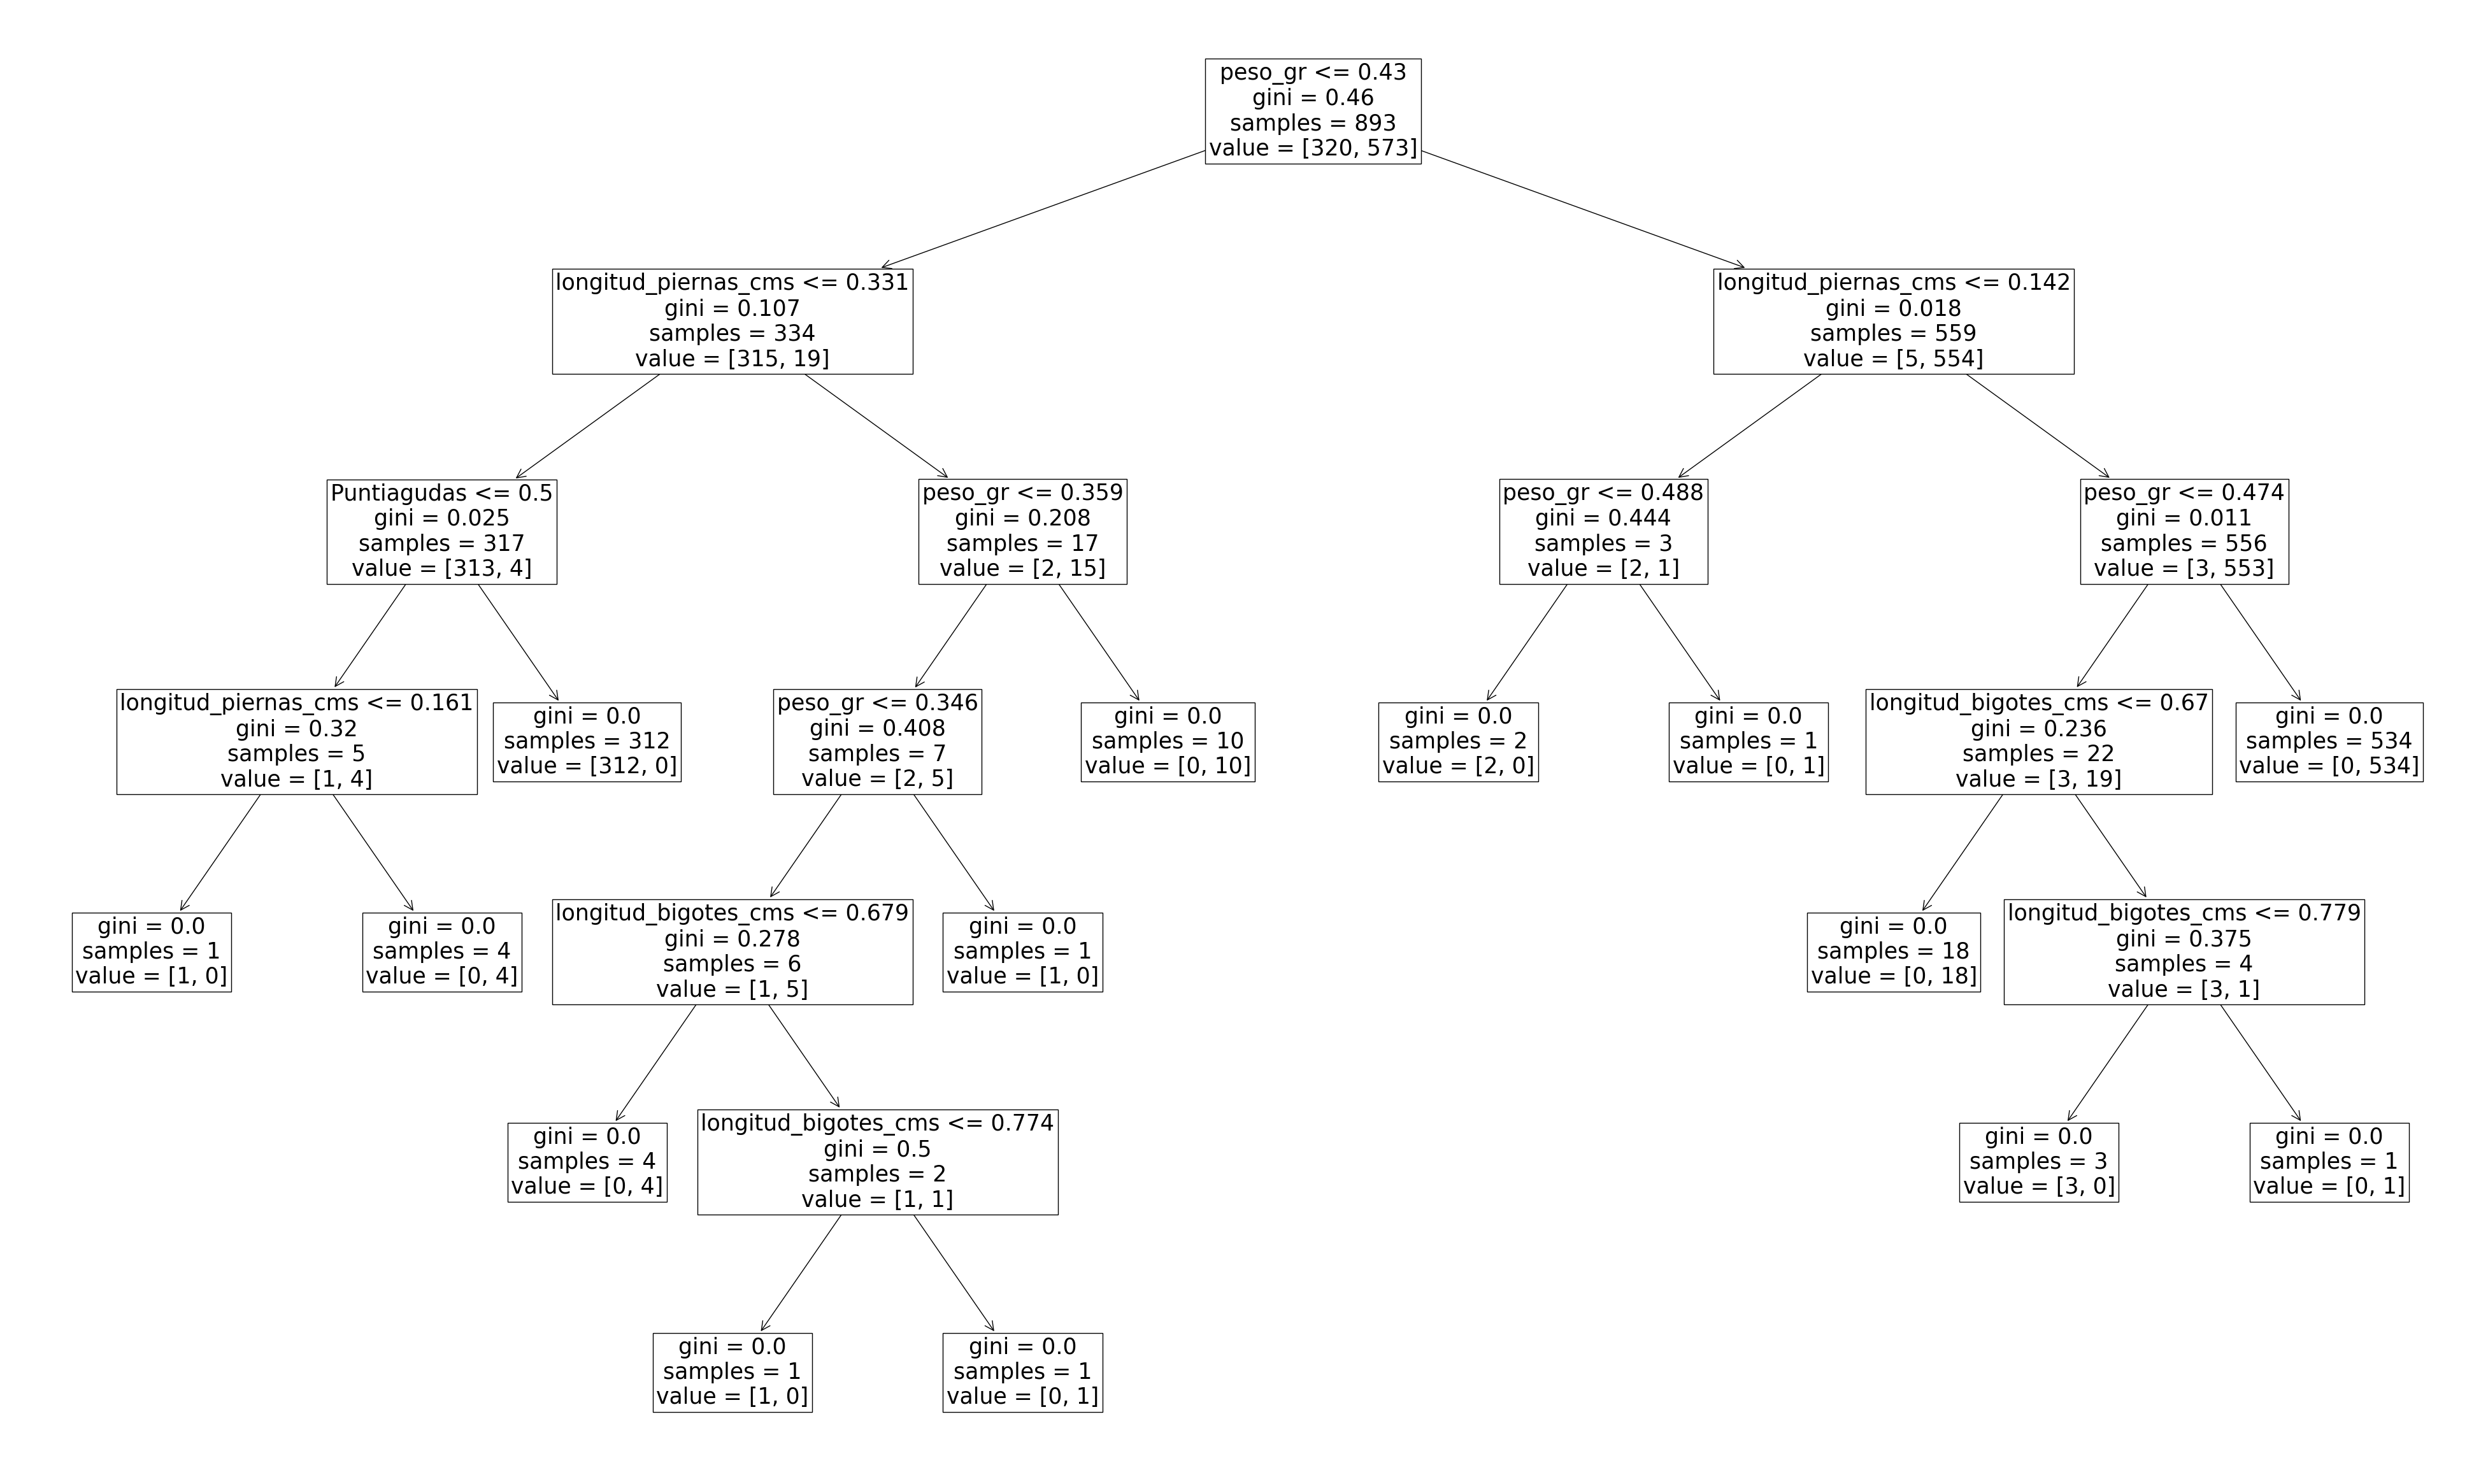

In [41]:
plt.figure(figsize=(50,30))
tree.plot_tree(model_tree,feature_names=X.columns,fontsize=25)
plt.show()

# Random forest classification model

In [42]:
from sklearn.ensemble import RandomForestClassifier

model_forest=RandomForestClassifier()
model_forest.fit(X_train_tranformada,y_train)

RandomForestClassifier()

In [43]:
y_hat=model_forest.predict(X_test_transormada)

## Model evaluation

In [44]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,roc_auc_score

confusion_matrix(y_test,y_hat)

array([[128,   1],
       [  2, 253]], dtype=int64)

In [45]:
model_forest_acc=accuracy_score(y_test,y_hat)
model_forest_acc

0.9921875

In [46]:
model_forest_f1=f1_score(y_test,y_hat)
model_forest_f1

0.994106090373281

In [47]:
model_forest_auc=roc_auc_score(y_test,y_hat)
model_forest_auc

0.992202462380301

## Model interpretation

As we have a forest, i.e., a lot of trees, we can't plot each tree to understand the desicions behind. Nevertheless, we can still use `feature_importances_` method to measure the _average_ importance of each variable inside each tree.

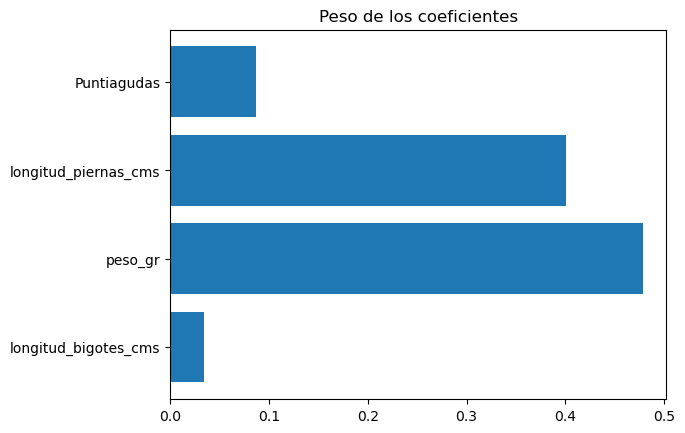

In [48]:
plt.barh(list(X.columns),list(model_forest.feature_importances_))
plt.title("Peso de los coeficientes")
plt.show()

# Model selection

In [49]:
metrics={"Accuracy":[model_logit_acc,model_knn_acc,model_tree_acc,model_forest_acc],
         "F1-Score":[model_logit_f1,model_knn_f1,model_tree_f1,model_forest_f1],
         "AUC":[model_logit_auc,model_knn_auc,model_tree_auc,model_forest_auc]
}

summary=pd.DataFrame(metrics,index=["Logistic","KNN","Tree","RFores"])

In [50]:
summary

,Accuracy,F1-Score,AUC
Logistic,0.992188,0.994083,0.994118
KNN,0.992188,0.994083,0.994118
Tree,0.981771,0.986193,0.982444
RFores,0.992188,0.994106,0.992202


# Conclusion

After performing these 4 models, the user can now choose between them by comparing the three metrics used.
However, the work here is not done yet, since we can also play around with hyperparamters in each model, which may lead to improved results.

This exercise is a good way to train ourselves on how to manage the data and how to develop a machine learning model.
Additionally, it is also a good method to compare metrics between models.